In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver  
from selenium.common.exceptions import NoSuchElementException  
import time 
import pandas as pd

In [ ]:
# For my Homework2, I only scrap the information on the first page of SixthTone's Deep Tone. However, the website is a dynamic webpage. So, in the first part of Homework 3, I use webdriver from selenium trying to get all the 27 pages.

In [2]:
browser = webdriver.Chrome()
browser.get('http://www.sixthtone.com/features/26167/DeepTones')
time.sleep(2) 

In [3]:
def get_articles_from_browser():
    
    bs = BeautifulSoup(browser.page_source,"lxml")
    mypages =bs.find_all('div', attrs = {'class':'card-item'})
    articles = []
    for mypage in mypages[1:]:
        article = {}
        title = mypage.find('h3',attrs = {'class':'heading-3'})
        author = mypage.find('div',attrs={'class':'author-name'})
        section = mypage.find('li',attrs = {'class':'129 first last'})
        article['title'] = title.text.strip()
        article['author'] = author.text.strip().replace('\xa0',' ')
        article['section'] = section.text.strip()
        articles.append(article) 
    return articles  

In [4]:
all_page_articles = []
for i in range(27):
    time.sleep(2)
    try:
        new_articles = get_articles_from_browser()
        all_page_articles.extend(new_articles)
        buttons = browser.find_element_by_xpath("//a[@title='Go to next page']")
        buttons.click()
    except Exception as e:
        print(e)
        print('Error on page %s' % i)

Message: unknown error: Element <a title="Go to next page" data-page="2" style="padding-left:0" onclick="ajaxifyPager('objectid=26167',(5))">...</a> is not clickable at point (802, 549). Other element would receive the click: <div id="overlay-loading" class="overlay-loading" style="display: block; opacity: 1;">...</div>
  (Session info: chrome=65.0.3325.181)
  (Driver info: chromedriver=2.37.544337 (8c0344a12e552148c185f7d5117db1f28d6c9e85),platform=Mac OS X 10.13.3 x86_64)

Error on page 3
Message: unknown error: Element <a title="Go to next page" data-page="2" style="padding-left:0" onclick="ajaxifyPager('objectid=26167',(5))">...</a> is not clickable at point (802, 549). Other element would receive the click: <div id="overlay-loading" class="overlay-loading" style="display: block; opacity: 1;">...</div>
  (Session info: chrome=65.0.3325.181)
  (Driver info: chromedriver=2.37.544337 (8c0344a12e552148c185f7d5117db1f28d6c9e85),platform=Mac OS X 10.13.3 x86_64)

Error on page 4
Message:

In [5]:
df = pd.DataFrame(all_page_articles)

In [6]:
df

,author,section,title
0,Lin Qiqing,fashion,"Off the Racks: In China, Push-Up Bras Are So L..."
1,Kenrick Davis,lifestyle,The Gun-Loving Chinese Tourists Hunting for Ne...
2,Wang Lianzhang,lifestyle,Beauty Boys: The Chinese Men Changing the Face...
3,Fu Danni,Dealing With Death,Resting in the Deep
4,Wang Lianzhang,Dealing With Death,Fear of Dying Alone Spurs Seniors to Plan Own ...
5,Fan Yiying,Dealing With Death,"Dealing With Death, China’s Biggest Taboo"
6,Yin Yijun,arts,Everything’s a Joke for China’s Goddess of Gags
7,Liang Chenyu,arts,Pink Bits: Feminist Pop Artist Peels Back Skin...
8,Lu Yunwen,aging,Dancing Grannies Share Stories From Their Past
9,Yin Yijun,TV & film,The Chinese Film Awards No One Wants to Win


In [11]:
df['title'][0].split()

['Off',
 'the',
 'Racks:',
 'In',
 'China,',
 'Push-Up',
 'Bras',
 'Are',
 'So',
 'Last',
 'Year']

In [12]:
all_title = []
for title in df['title']:
    all_title.extend(str(title).split())

In [14]:
word_count = {}
for word in all_title:
    if word not in word_count:
        word_count[word]=1
    else:
        word_count[word]=word_count[word]+1

In [16]:
df_word_count=pd.Series(word_count).to_frame().reset_index()

In [17]:
df_word_count.sort_values(by=0,ascending=False)

,index,0
219,China’s,137
1621,to,118
1617,of,112
1383,The,105
1620,the,101
220,Chinese,80
1614,in,71
1611,for,62
1604,a,57
1618,on,38


In [34]:
stop_words = set([
    'to',
    'To',
    'of',
    'Of',
    'the',
    'The',
    'in',
    'In',
    'How',
    'For',
    'for',
    'On',
    'on',
    'No',
    'A',
    'a',
    'Up',
    'and',
    'With',
    'with',
    'From',
    'from',
    'More',
    'Their',
    'their'
    'We',
    'we',
    'It',
    'it',
    'Is',
    'is',
    'as',
    'Out',
    'Are',
    'are',
    'Into',
    'Be',
    'Can'
])

In [35]:
def is_not_stop_word(x):
    return x not in stop_words
df_clean_word=df_word_count[
    df_word_count['index'].apply(is_not_stop_word)
].sort_values(by=0,ascending=False)

In [33]:
df_clean_word

,index,0
219,China’s,137
220,Chinese,80
213,China,35
908,New,18
823,Market,13
498,Find,12
1219,Shanghai,12
983,Parents,11
416,Elderly,11
546,Future,11


In [173]:
cleanword = {}
for index, value in  df_clean_word.as_matrix():
    cleanword[index] = value

In [260]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud()

In [261]:
w=wc.generate_from_frequencies(cleanword)

(-0.5, 399.5, 199.5, -0.5)

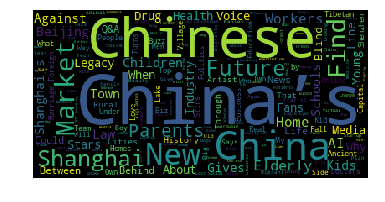

In [262]:
plt.imshow(w)
plt.axis('off')

### 1. From the wordcloud we can see that the top 3 words are 'China's', 'Chinese' and 'China'. Sixthtone as an online publication that produces informed and insightful content on contemporary China focus extensively on China-related topics. The fourth word 'New' might embody that Sixthtone's reporting always closely follows the new trends.

In [263]:
s_section = df['section'].value_counts()
s_section

environment                37
health                     36
education                  31
arts                       25
business                   25
TV & film                  24
vivid tones                22
music                      21
entertainment              16
family                     15
science                    14
law & justice              14
crime                      13
sports                     11
technology                 11
property                   10
gender                     10
disability                 10
Hu Line                     9
China’s AI Revolution       9
literature                  9
migration                   9
subculture                  9
race & ethnicity            8
disasters                   8
rural China                 8
labor                       8
Golden Week Travel          7
lifestyle                   7
sex & relationships         7
                           ..
animals                     3
economy                     3
Yangtze De

(-0.5, 399.5, 199.5, -0.5)

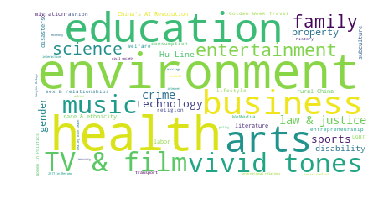

In [264]:
wc2 = WordCloud(background_color = 'white')
w2 = wc2.generate_from_frequencies (s_section)
plt.imshow(w2)
plt.axis('off')

### 2. From the wordcloud of all the sections we can see that Sixthtone's DeepTones, the in-depth feature section of the publication concentrates most on people's livelihood in China, with the top three words are 'environment', 'health', and 'education'. With the advantages of writing in English, Sixthtone could discuss certain sensitive issues more freely.

In [265]:
s_author = df['author'].value_counts()
s_author

Fan Yiying             43
Ni Dandan              36
Yin Yijun              29
Cai Yiwen              28
Fu Danni               26
Wang Lianzhang         22
Kenrick Davis          21
Chen Na                20
Yan Jie                18
Denise Hruby           17
Wang Yiwei             16
Zhang Liping           15
Bibek Bhandari         15
Liang Chenyu           13
Li You                 13
Lin Qiqing             12
Wu Yue                  9
Li Xueqing              9
Shi Yi                  8
August Rick             7
Colum Murphy            7
Nathan Jubb             7
Dong Heng               6
Yuan Lu                 6
Qian Zhecheng           6
Jessica Levine          6
Matthew Walsh           5
Ding Yining             5
Mark Andrews            5
Qian Jinghua            5
                       ..
Li Sizhe                1
Casey Hall              1
Lu Hongyong             1
Savannah Billman        1
Wang Xinxing            1
Joe Pickles             1
Wu Haiyun               1
David Paulk 

In [266]:
top_author = s_author[:10]

### 3. I try to see and present the top 10 contributors in Deep Tone and how many articles they have produced.

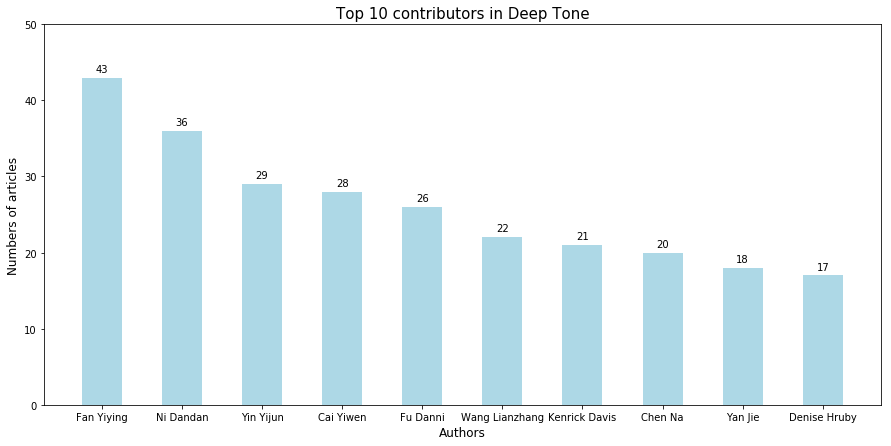

In [267]:

plt.figure(figsize = (15,7))
x = top_author.index
y= top_author.values
plt.bar(x,y,width=0.5,color = 'lightblue') 
plt.title('Top 10 contributors in Deep Tone',fontsize=15)
plt.xlabel('Authors',fontsize=12)
plt.ylabel('Numbers of articles',fontsize=12)
plt.yticks([0,10,20,30,40,50])
for a,b in zip(x,y):
     plt.text(a, b+0.5, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)

plt.show()   